# 0. 문제정의 및 알아야 할 정보

- 나스닥의 거래시간은 오전 7시부터 오후 4시입니다.
- 3시50분부터 오후 4시까지는 우리나라의 장마감 동시호가와 동일하게 Close auction session이 운영

## 1) 나스닥 마감 경매
- 나스닥 일일 평균 거래량의 거의 10%가 마감 경매에서 발생
- 나스닥 마감 경매의 경우 거래소는 거래일 시작과 동시에 주문 접수를 시작
- 오후 3시 50분 ~ 오후 4시(마감되기 전 10분 동안) 경매장 상태를 공개하기 시작, 이 시점에서 주문이 즉시 매칭
  1. 3:50 p.m. 이전 : Market-On-Close(MOC), Limit-On-Close (LOC), ImbalanceOnly (IO) orders
  2. 3:50 p.m. ~ : 마감정보 조기 전파 시작.
    - 나스닥은 MOC, LOC, IO 주문을 계속 받아들임(취소하거나 수정할 수 없음).
  3. 3:55 p.m. ~ : 마감 정보 배포가 시작.
    - 나스닥은 MOC 주문 접수를 중단.
    - LOC 주문은 오후 3시 58분까지 접수 가능.
    - 취소하거나 수정할 수는 없음.
    - IO 주문은 오후 4시까지 접수 가능.
  4. 3:58 p.m. ~ : 나스닥 LOC 주문 접수 중단.
  5. 4:00 p.m. ~ : 종료 프로세스가 시작.
- MOC, LOC, IO
  - Market-on-Close (MOC) order : 장마감 시장가 주문
  - Limit-on-Close (LOC) order : 장마감 지정가 주문
  - Imbalance-Only (IO) order : 물량 차이를 해소하기 위한 주문 (예를 들어 매도 물량이 매수 물량보다 많은 경우 IO 매수 주문이 가능)
- 오후 3시 50분 ~ 오후 3시 55분 정보(Net Order Imbalance Indicator(NOII))는 10초마다 전파
  - [정보의 종류]
  - Number of Paired Shares : 나스닥은 current reference price과 쌍을 이룰수 있음
  - Imbalance Side: 불균형의 방향
  - Imbalance Quantity : 마감 주식 수
  - Current Reference Price : Best Bid and Offer(BBO)
    - 불균형이 최소화되고 중간점으로부터 거리가 최소화됨.
- 오후 3시 55분 ~ 오후 4시 정보는 매초마다 NOII 전파
  - Near Indicative Clearing Price : 마감 주문(MOC, LOC, IO) 및 지속적인 시장 주문을 기반으로 일치하는 주식 수를 극대화
  - Far Indicative Clearing Price : 이 계산에서는 continuous market orders이 제외됩니다.

## 2) Order book의 이해

🔥 예시)

|Bid|Price|Ask|
|---|---|---|
||10|1|
|3|9|2|
|4|8|4|

- 🤚 Bid/Ask : 매수호가/매도호가
- 🤚 Price : 가격
- 🤚 매수자는 최대한 싸게 사려고 한다. (자신의 매수호가 아래의 가격에서 거래가능)
- 🤚 매도자는 최대한 비싸게 팔려고 한다. (자신의 매도호가 위의 가격에서 거래가능)

|Price|Bid Lots|Ask Lots|Matched|
|---|---|---|---|
|10|0|1|0|
|9|3|6|3|
|8|7|4|4|

<br>[결론]
<br> ➡➡ ***bid_price = 9*** [매수자가 주식을 사려고 할 때 지불할 준비가 된 가장 높은 가격]
<br> ➡➡ ***bid_size = 3*** [해당 Bid Price에서 매수하려는 주식의 수량]
<br> ➡➡ ***ask_price = 8*** [매도자가 주식을 팔려고 할 때 받아들일 수 있는 가장 낮은 가격]
<br> ➡➡ ***ask_size = 4*** [해당 Ask Price에서 팔려는 주식의 수량]

<br> ✅ the uncross price = 8 [주식 일치 수를 최대화하는 가격]
<br> ➡➡ ***the uncross price = 8*** [주식 일치 수를 최대화하는 가격]

<br> ✅ imbalance = 3(buy direction) [the uncross price에서 bid lots과 Ask lots의 차이]
<br> ➡➡ ***imbalance_buy_sell_flag = 1*** [매수 방향 : 1, 매도 방향 : -1, NONE : 0]

<br> ✅ Far Price
<br> ✅ Near Price
<br> ➡➡ 어떻게 산출하는지 모르겠음..

<br> ✅ near price is between the best bid and ask ➡ reference price = near price
<br> ✅ near price < best bid ➡ reference price = best bid
<br> ✅ near price > best ask ➡ reference price = best ask
<br> ➡➡ near price는 위 방식으로 산출

<br> ✅ Matched Size
<br> ➡➡ 계속 쌓여가는 가격

<br> ✅ WAP = ${BidPrice * AskSize + AskPrice * BidSize} \over {BidSize + AskSize}$
<br> ✅ Target = $({WAP_{t+60} \over {WAP_t}} − {Index_{t+60} \over {Index_t}})$

# 1. 필수 패키지 불러오기

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 가져오기

In [ ]:
basic_path = "/content/drive/MyDrive/data/optiver-trading-at-the-close/"

train_data = pd.read_csv(basic_path + "train.csv")
test_data = pd.read_csv(basic_path + "example_test_files/test.csv")
revealed_target = pd.read_csv(basic_path + "example_test_files/revealed_targets.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 1) train data 컬럼 설명
[모든 크기 관련 열은 USD 기준]<br>
[모든 가격 관련 열은 경매 기간 시작 시 stock wap(가중 평균 가격)을 기준으로 한 가격 변동으로 변환]
- stock_id : 주식의 고유 식별자. 모든 시간 버킷에 모든 주식 ID가 존재하는 것은 아님.
- date_id : 날짜의 고유 식별자. 날짜 ID는 모든 주식에서 순차적이고 일관됨.
- seconds_in_bucket : 해당일의 마감 경매 시작 이후 경과된 초 수로, 항상 0부터 시작.
- imbalance_size : 현재 reference_price과 일치하지 않는 금액(USD).
- imbalance_buy_sell_flag : 경매 불균형의 방향을 반영하는 지표.
  - buy-side imbalance : 1
  - sell-side imbalance : -1
  - no imbalance : 0
---
- reference_price
  - 순서대로 쌍을 이루는 주식이 최대화되고 불균형이 최소화되며 매수-매도 중간점으로부터의 거리가 최소화되는 가격.
  - 또한, 최적의 매수 가격과 매도 가격 사이의 경계가 가까운 가격과 동일하다고 생각할 수도 있음.
- matched_size : 현재 reference_price(USD)으로 매칭할 수 있는 금액.
- far_price : 경매 관심자만을 기준으로 일치하는 주식 수를 최대화하는 교차 가격. 이 계산에서는 지속적인 시장 주문이 제외.
  - Far 가격은 보고 시점에 경매장의 가상 교차되지 않은 가격을 의미.
- near_price : 경매 및 지속적인 시장 주문을 기반으로 일치하는 주식 수를 최대화하는 교차 가격.
---
- bid_price : non-auction book에서 가장 경쟁력 있는 구매 수준의 가격.
- bid_size : non-auction book에서 가장 경쟁력 있는 매수 수준의 달러 명목 금액.
- ask_price : non-auction book에서 가장 경쟁력 있는 판매 수준의 가격.
- ask_size : non-auction book에서 가장 경쟁력 있는 매도 수준의 달러 명목 금액.
  - [Order Book Data]
  - 매수 가격(Bid Price): 구매자가 구매하려는 가격입니다.
  - 매도 가격(Ask Price): 판매자가 판매하려는 가격입니다.
  - 매수 규모(Bid Size): 구매자가 사고 싶어하는 주식의 양입니다.
  - 매도 규모(Ask Size): 판매자가 판매하려는 주식의 양입니다.
  - => 시장에서는 거래가 이루어지려면 동일한 가격의 구매자와 판매자가 필요.
- wap : non-auction book의 가중 평균 가격.
  - ${bid-price * ask-size + ask-price * bid-size} \over {bid-size + ask-size}$
- target : wap of the stock의 60초 미래 움직임에서 synthetic index의 60초 미래 움직임을 뺀 값.
  - train 세트에만 제공.
  - synthetic index는 Optiver가 이번 대회를 위해 구성한 나스닥 상장주식의 맞춤형 가중지수.
  - target 단위는 베이시스 포인트(Basis Point)이며, 이는 금융시장에서 일반적인 측정 단위.
  - 1 베이시스 포인트 가격 변동은 0.01% 가격 변동과 동일.
  - t가 현재 관찰 시간인 경우 target은 다음과 같이 정의할 수 있음.
    - $Target = ({{StockWAP_{t+60}} \over {StockWAP_t}} - {{IndexWAP_{t+60}} \over {IndexWAP_t}}) * 10000$
---
- time_id
- row_id : 유니크 값
  - (date_id)+(seconds_in_bucket)+(stock_id)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [ ]:
# check some first data
print("number of rows:", len(train_data))
print("number of columns:", len(train_data.columns))
print("number of unique stocks:", len(train_data['stock_id'].unique()))
print("number of unique date_id:", len(train_data['date_id'].unique()))
print("number of unique time_id:", len(train_data['time_id'].unique()))
print("number of unique row_id:", len(train_data['row_id'].unique()))
print("number of unique seconds_in_bucket:", len(train_data['seconds_in_bucket'].unique()))

number of rows: 5237980
number of columns: 17
number of unique stocks: 200
number of unique date_id: 481
number of unique time_id: 26455
number of unique row_id: 5237980
number of unique seconds_in_bucket: 55


In [ ]:
print("Shape of the train data: ", train_data.shape)
print("[Nulls]\n", train_data.isna().sum())

Shape of the train data:  (5237980, 17)
[Nulls]
 stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


## 2) 각 컬럼 자세히 알아보기

In [ ]:
def inspect_columns(df):

    # Get this function from other's Jupyter
    # A helper function that does a better job than df.info() and df.describe()

    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': df.isna().sum(),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

inspect_columns(train_data)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
stock_id,False,200,False,0,0,27,199,int64
date_id,False,481,False,0,0,1,480,int64
seconds_in_bucket,False,55,False,0,0,0,540,int64
imbalance_size,False,2971863,True,220,3180602.69,0.0,1884285.71,float64
imbalance_buy_sell_flag,False,3,False,0,1,0,-1,int64
reference_price,False,28741,True,220,0.999812,1.000195,1.002129,float64
matched_size,False,2948862,True,220,13380276.64,5583966.2,24073677.32,float64
far_price,False,95739,True,2894342,NaN,NaN,1.000859,float64
near_price,False,84625,True,2857180,NaN,NaN,1.001494,float64
bid_price,False,28313,True,220,0.999812,0.999579,1.002129,float64


In [ ]:
train_data[(train_data['date_id'] == 0)][['stock_id', 'date_id', 'seconds_in_bucket', 'row_id']]

,stock_id,date_id,seconds_in_bucket,row_id
0,0,0,0,0_0_0
1,1,0,0,0_0_1
2,2,0,0,0_0_2
3,3,0,0,0_0_3
4,4,0,0,0_0_4
...,...,...,...,...
10500,194,0,540,0_540_194
10501,195,0,540,0_540_195
10502,196,0,540,0_540_196
10503,197,0,540,0_540_197


In [ ]:
train_data[(train_data['date_id'] == 0) & (train_data['stock_id'] == 0)][['stock_id', 'date_id', 'seconds_in_bucket', 'row_id','far_price', 'near_price']]

,stock_id,date_id,seconds_in_bucket,row_id,far_price,near_price
0,0,0,0,0_0_0,NaN,NaN
191,0,0,10,0_10_0,NaN,NaN
382,0,0,20,0_20_0,NaN,NaN
573,0,0,30,0_30_0,NaN,NaN
764,0,0,40,0_40_0,NaN,NaN
...,...,...,...,...,...,...
9550,0,0,500,0_500_0,1.000241,1.000026
9741,0,0,510,0_510_0,1.000241,1.000241
9932,0,0,520,0_520_0,1.000241,1.000026
10123,0,0,530,0_530_0,1.000241,1.000026


In [ ]:
stock_id_0_df = train_data[train_data['stock_id'] == 0].head(1000)
stock_id_0_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190820,0,18,50,0.00,0,1.000123,6853019.74,NaN,NaN,1.000123,29130.78,1.000330,36687.20,1.000215,6.109476,995,18_50_0
191012,0,18,60,0.00,0,1.000123,6853019.74,NaN,NaN,1.000123,67842.78,1.000226,5129.87,1.000219,5.520582,996,18_60_0
191204,0,18,70,0.00,0,1.000123,6853019.74,NaN,NaN,1.000123,10839.36,1.000226,10162.95,1.000176,6.539822,997,18_70_0
191396,0,18,80,0.00,0,1.000020,6853019.74,NaN,NaN,1.000020,9677.00,1.000123,3967.98,1.000093,5.710125,998,18_80_0


# 3. 데이터 전처리

In [ ]:
# 1. near_price = reference_price = far_price --> imbalance_buy_sell_flag = imbalance_size = 0
a = len(train_data.loc[train_data['near_price'] == train_data['reference_price']]['imbalance_size'])
b = len(train_data.loc[train_data['near_price'] == train_data['reference_price']]['imbalance_size'].unique())
print(a, b)

# 2. near_price = reference_price
# -> near price is between the best bid and ask

810511 56535


In [ ]:
# ▶ imbalance_size
# imbalance_size = [the uncross price에서 bid lots과 Ask lots의 차이] * reference price
# [the uncross price에서 bid lots과 Ask lots의 차이] = imbalance_size / reference price
train_data.imbalance_size / train_data.reference_price

0          3.181201e+06
1          1.666212e+05
2          3.030129e+05
3          1.191564e+07
4          4.477595e+05
               ...     
5237975    2.439949e+06
5237976    3.492859e+05
5237977    0.000000e+00
5237978    1.001690e+06
5237979    1.880283e+06
Length: 5237980, dtype: float64

In [ ]:
# ▶ matched_size
# matched_size = (주식 일치 수) * reference price
# (주식 일치 수) = matched_size / reference price
# => 10초 동안 거래된 주식 수


In [ ]:
def generate_features(df):
    features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap',
                'imb_s1', 'imb_s2'
               ]

    df['imb_s1'] = df.eval('(bid_size-ask_size)/(bid_size+ask_size)')
    df['imb_s2'] = df.eval('(imbalance_size-matched_size)/(matched_size+imbalance_size)')

    prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

    for i,a in enumerate(prices):
        for j,b in enumerate(prices):
            if i>j:
                df[f'{a}_{b}_imb'] = df.eval(f'({a}-{b})/({a}+{b})')
                features.append(f'{a}_{b}_imb')

    for i,a in enumerate(prices):
        for j,b in enumerate(prices):
            for k,c in enumerate(prices):
                if i>j and j>k:
                    max_ = df[[a,b,c]].max(axis=1)
                    min_ = df[[a,b,c]].min(axis=1)
                    mid_ = df[[a,b,c]].sum(axis=1)-min_-max_

                    df[f'{a}_{b}_{c}_imb2'] = (max_-mid_)/(mid_-min_)
                    features.append(f'{a}_{b}_{c}_imb2')

    return df[features]

df = generate_features(train_data)
df

,seconds_in_bucket,imbalance_buy_sell_flag,imbalance_size,matched_size,bid_size,ask_size,reference_price,far_price,near_price,ask_price,bid_price,wap,imb_s1,imb_s2,far_price_reference_price_imb,near_price_reference_price_imb,near_price_far_price_imb,ask_price_reference_price_imb,ask_price_far_price_imb,ask_price_near_price_imb,bid_price_reference_price_imb,bid_price_far_price_imb,bid_price_near_price_imb,bid_price_ask_price_imb,wap_reference_price_imb,wap_far_price_imb,wap_near_price_imb,wap_ask_price_imb,wap_bid_price_imb,near_price_far_price_reference_price_imb2,ask_price_far_price_reference_price_imb2,ask_price_near_price_reference_price_imb2,ask_price_near_price_far_price_imb2,bid_price_far_price_reference_price_imb2,bid_price_near_price_reference_price_imb2,bid_price_near_price_far_price_imb2,bid_price_ask_price_reference_price_imb2,bid_price_ask_price_far_price_imb2,bid_price_ask_price_near_price_imb2,wap_far_price_reference_price_imb2,wap_near_price_reference_price_imb2,wap_near_price_far_price_imb2,wap_ask_price_reference_price_imb2,wap_ask_price_far_price_imb2,wap_ask_price_near_price_imb2,wap_bid_price_reference_price_imb2,wap_bid_price_far_price_imb2,wap_bid_price_near_price_imb2,wap_bid_price_ask_price_imb2
0,0,1,3180602.69,13380276.64,60651.50,8493.03,0.999812,NaN,NaN,1.000026,0.999812,1.000000,0.754340,-0.615890,NaN,NaN,NaN,0.000107,NaN,NaN,0.000000,NaN,NaN,-0.000107,0.000094,NaN,NaN,-0.000013,9.400884e-05,-1.000000e+00,-1.000214e+00,-1.000214e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.927541e+12,-1.000214e+00,-1.000214e+00,-1.000188e+00,-1.000188e+00,-1.000000e+00,1.382979e-01,-1.000026e+00,-1.000026e+00,-1.693353e+12,-1.000188,-1.000188,0.138298
1,0,-1,166603.91,1642214.25,3233.04,20605.09,0.999896,NaN,NaN,1.000660,0.999896,1.000000,-0.728751,-0.815787,NaN,NaN,NaN,0.000382,NaN,NaN,0.000000,NaN,NaN,-0.000382,0.000052,NaN,NaN,-0.000330,5.200270e-05,-1.000000e+00,-1.000764e+00,-1.000764e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-6.881500e+12,-1.000764e+00,-1.000764e+00,-1.000104e+00,-1.000104e+00,-1.000000e+00,6.346154e+00,-1.000660e+00,-1.000660e+00,9.367487e+11,-1.000104,-1.000104,6.346154
2,0,-1,302879.87,1819368.03,37956.00,18995.00,0.999561,NaN,NaN,1.000298,0.999403,1.000000,0.332935,-0.714567,NaN,NaN,NaN,0.000369,NaN,NaN,-0.000079,NaN,NaN,-0.000448,0.000220,NaN,NaN,-0.000149,2.985891e-04,-1.000000e+00,-1.000737e+00,-1.000737e+00,-1.000000e+00,-1.000158e+00,-1.000158e+00,-1.000000e+00,4.664557e+00,-1.000896e+00,-1.000896e+00,-1.000439e+00,-1.000439e+00,-1.000000e+00,6.788155e-01,-1.000298e+00,-1.000298e+00,2.778481e+00,-1.000597,-1.000597,0.499162
3,0,-1,11917682.27,18389745.62,2324.90,479032.40,1.000171,NaN,NaN,1.000214,0.999999,1.000000,-0.990340,-0.213547,NaN,NaN,NaN,0.000021,NaN,NaN,-0.000086,NaN,NaN,-0.000107,-0.000085,NaN,NaN,-0.000107,5.000003e-07,-1.000000e+00,-1.000043e+00,-1.000043e+00,-1.000000e+00,-1.000172e+00,-1.000172e+00,-1.000000e+00,2.500000e-01,-1.000215e+00,-1.000215e+00,-1.000171e+00,-1.000171e+00,-1.000000e+00,2.514620e-01,-1.000214e+00,-1.000214e+00,1.710000e+02,-1.000001,-1.000001,214.000000
4,0,-1,447549.96,17860614.95,16485.54,434.10,0.999532,NaN,NaN,1.000016,0.999394,1.000000,0.948687,-0.951109,NaN,NaN,NaN,0.000242,NaN,NaN,-0.000069,NaN,NaN,-0.000311,0.000234,NaN,NaN,-0.000008,3.030918e-04,-1.000000e+00,-1.000484e+00,-1.000484e+00,-1.000000e+00,-1.000138e+00,-1.000138e+00,-1.000000e+00,3.507246e+00,-1.000622e+00,-1.000622e+00,-1.000468e+00,-1.000468e+00,-1.000000e+00,3.418803e-02,-1.000016e+00,-1.000016e+00,3.391304e+00,-1.000606,-1.000606,0.026403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,540,-1,2440722.89,28280361.74,32257.04,319862.40,1.000317,0.999734,0.999734,1.000434,1.000317,1.000328,-0.816784,-0.841104,-0.000291,-0.000291,0.000000,0.000058,0.000350,0.000350,0.000000,0.000291

## 1) Target에 있는 Null 값 88개 제거하기

In [ ]:
train_data[train_data['target'].isna()] # Target이 nan인 데이터 탐색

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225338,158,388,510,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21391,388_510_158
4225538,158,388,520,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21392,388_520_158
4225738,158,388,530,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21393,388_530_158
4225938,158,388,540,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21394,388_540_158


In [ ]:
train_data = train_data[~train_data['target'].isna()]

## 2) time_id 제거하기

In [ ]:
train_data = train_data.drop('time_id', axis=1)
train_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,480_540_198


# 4. 데이터 시각화

array([[<Axes: title={'center': 'stock_id'}>,
        <Axes: title={'center': 'date_id'}>,
        <Axes: title={'center': 'seconds_in_bucket'}>,
        <Axes: title={'center': 'imbalance_size'}>],
       [<Axes: title={'center': 'imbalance_buy_sell_flag'}>,
        <Axes: title={'center': 'reference_price'}>,
        <Axes: title={'center': 'matched_size'}>,
        <Axes: title={'center': 'far_price'}>],
       [<Axes: title={'center': 'near_price'}>,
        <Axes: title={'center': 'bid_price'}>,
        <Axes: title={'center': 'bid_size'}>,
        <Axes: title={'center': 'ask_price'}>],
       [<Axes: title={'center': 'ask_size'}>,
        <Axes: title={'center': 'wap'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'time_id'}>]], dtype=object)

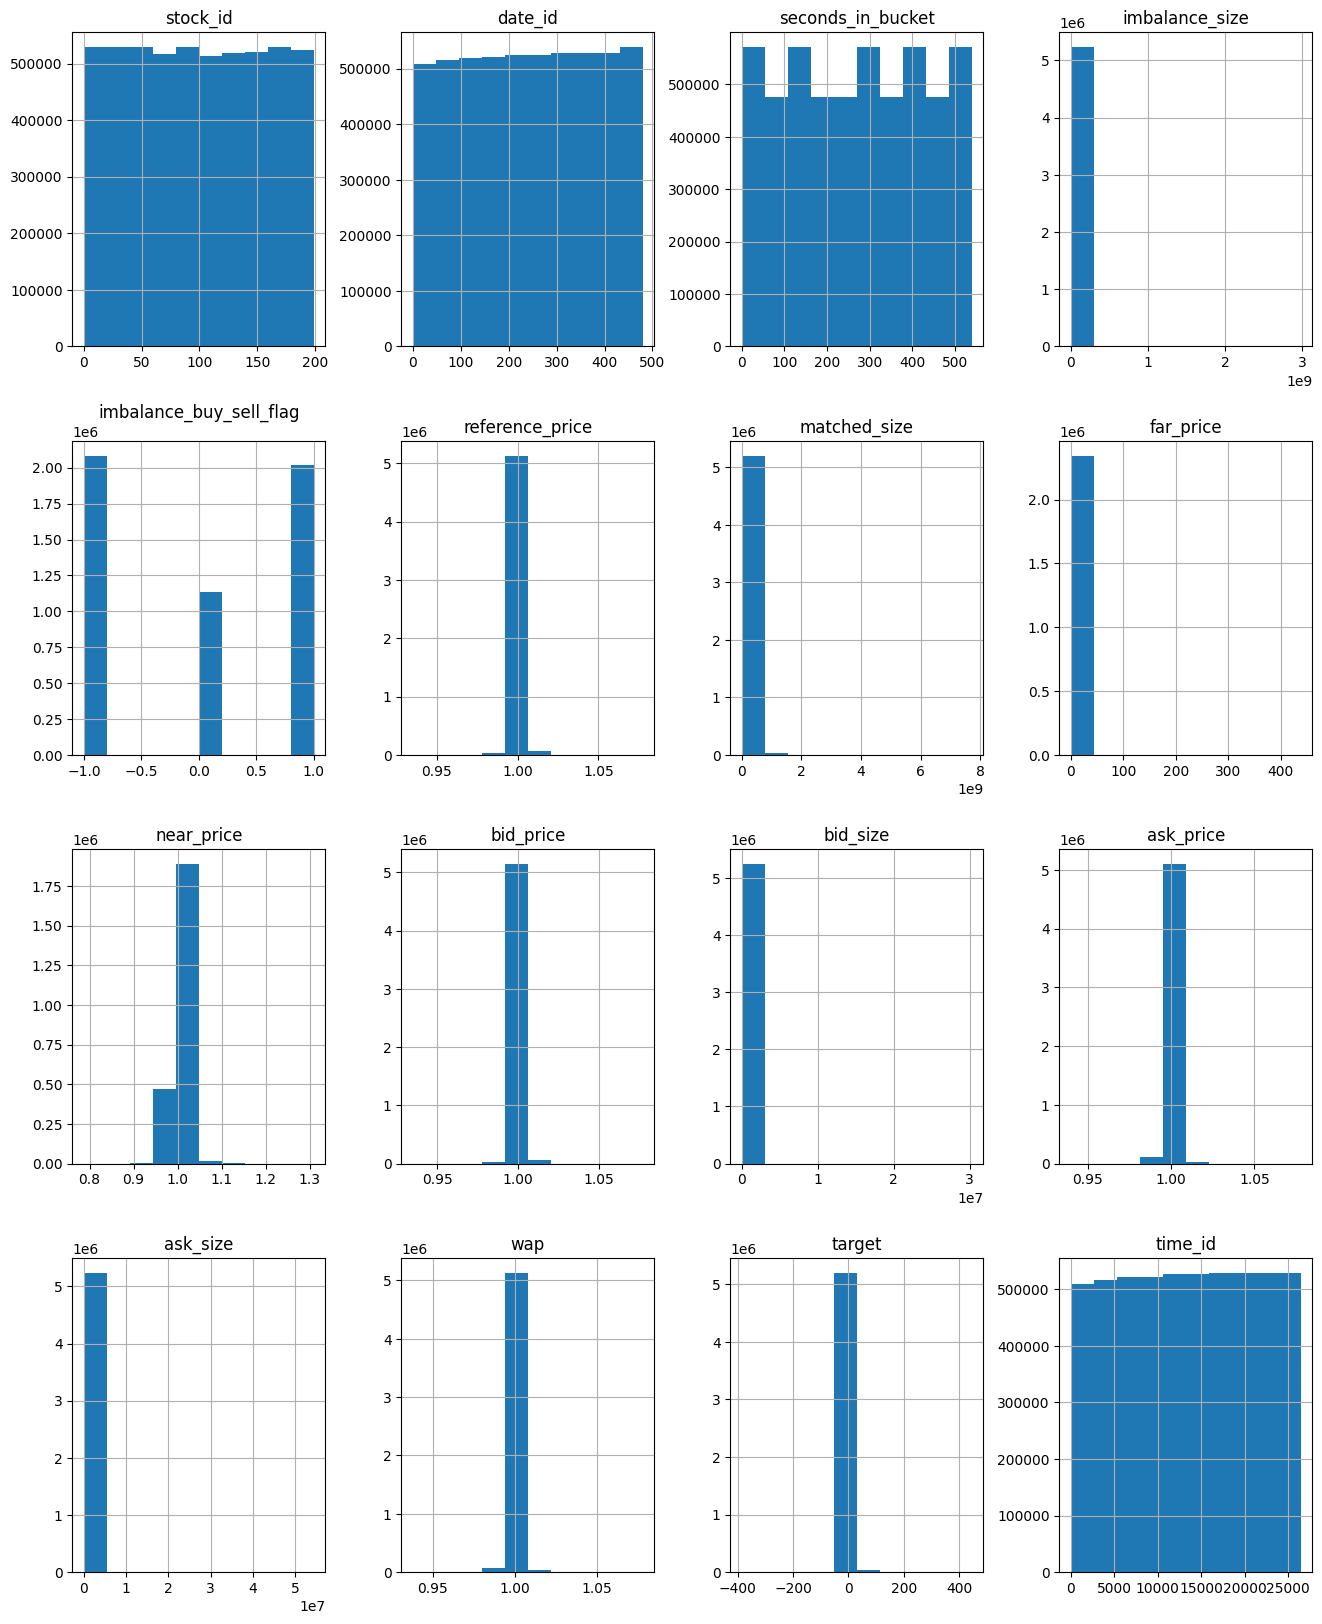

In [ ]:
# hist
train_data.hist(figsize=(16,20))

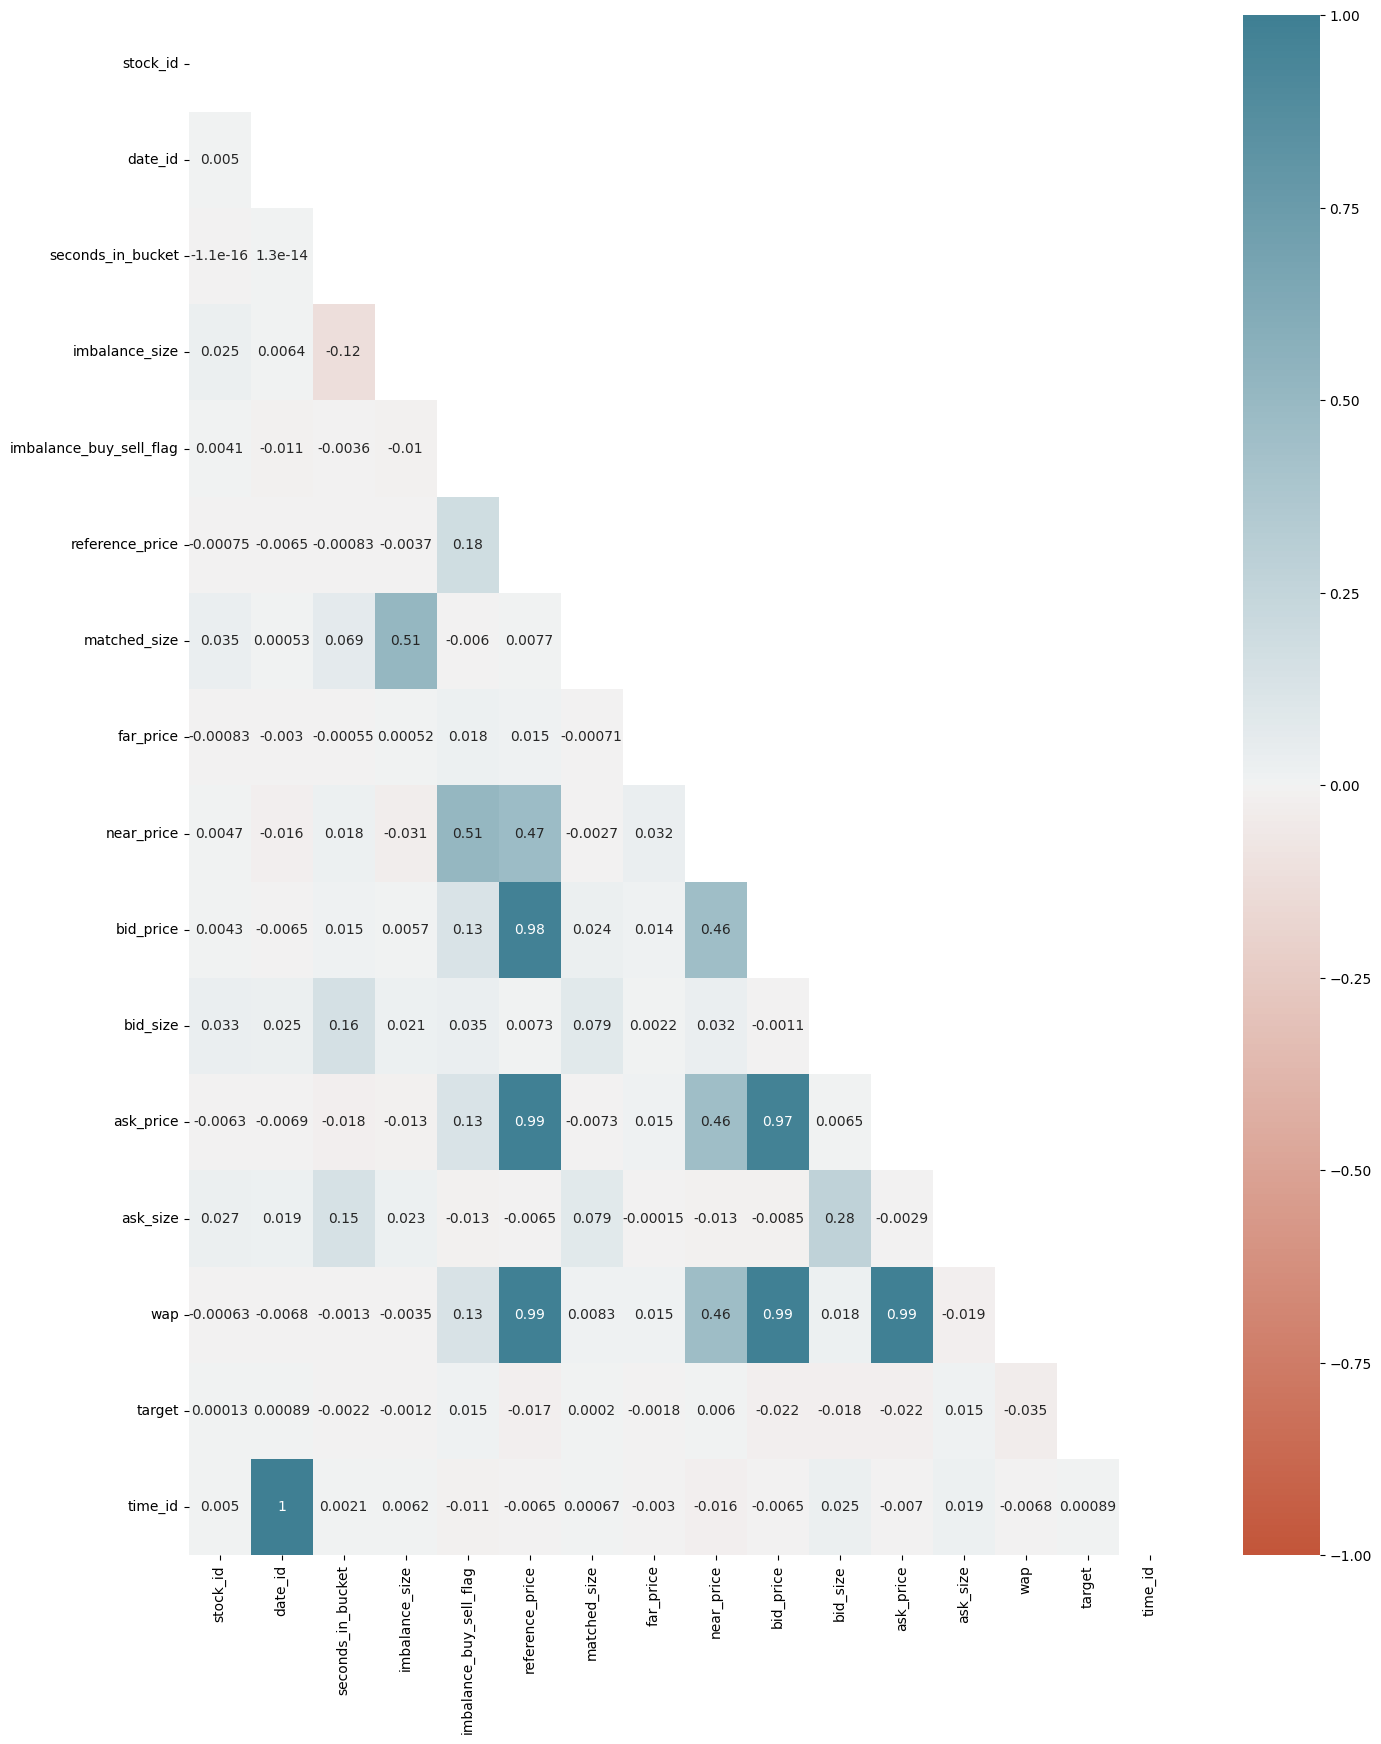

In [ ]:
# heatmap
plt.figure(figsize=(16, 20))

matrix = np.triu(train_data.corr())
sns.heatmap(train_data.corr(),
            annot=True, fmt='.2g',
            mask=matrix,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=256));

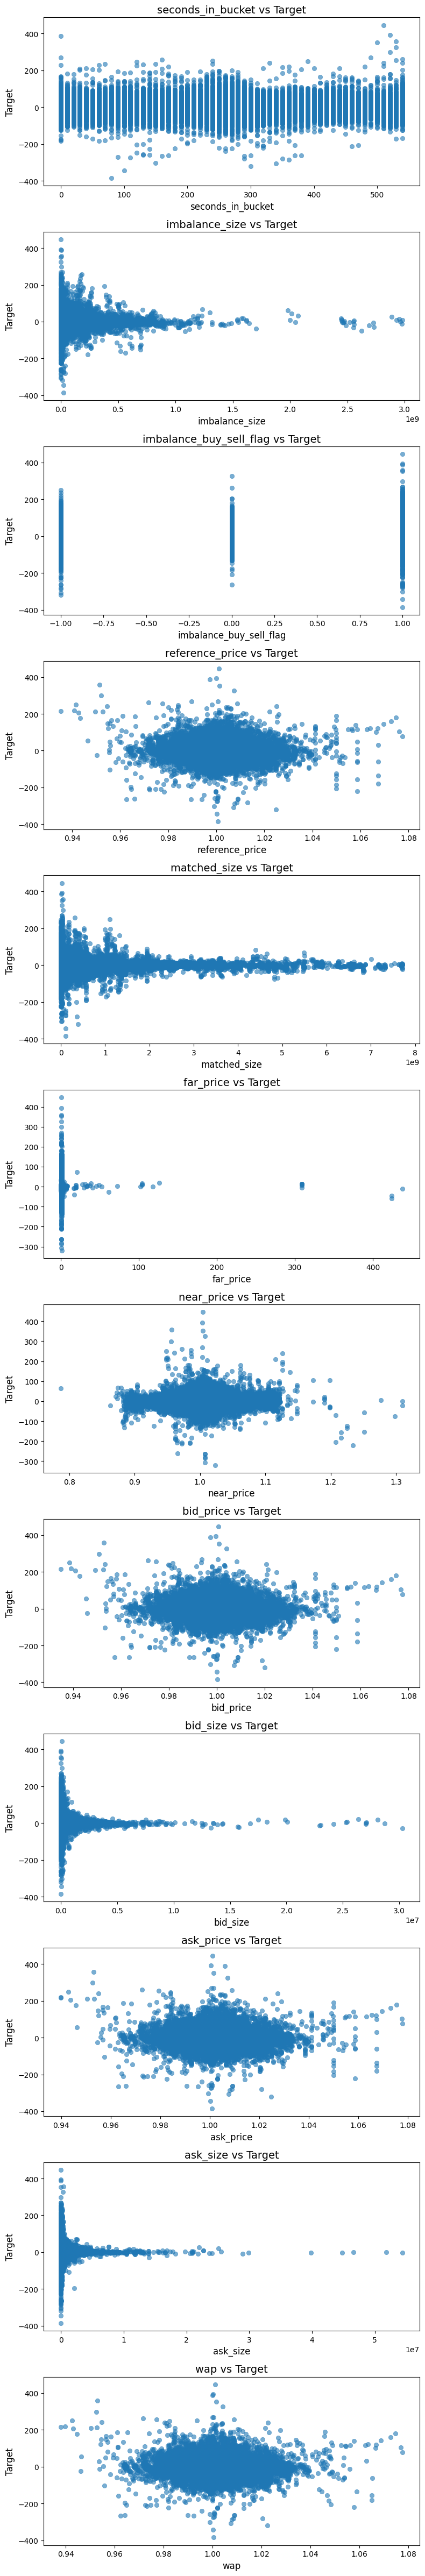

In [ ]:
# Select the features to plot against the target variable
features_to_plot = ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag',
                    'reference_price', 'matched_size', 'far_price', 'near_price',
                    'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']

# Initialize the figure
fig, ax = plt.subplots(len(features_to_plot), 1, figsize=(8, 4 * len(features_to_plot)))

# Create scatter plots for each feature against the target variable
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=feature, y='target', data=train_data, ax=ax[i], alpha=0.6, edgecolor=None)
    ax[i].set_title(f'{feature} vs Target', fontsize=14)
    ax[i].set_xlabel(feature, fontsize=12)
    ax[i].set_ylabel('Target', fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# WAP - Weighted Average Price
'''
[Weighted Averaged Price (WAP)]
WAP : 매수/매도 규모를 고려한 가격.
판매자가 많다 = 시장에 더 많은 공급이 있다 => 주식 가치가 낮아짐

1) More Buyer, more bid szie, therefore higher WAP
More Buyer = 매수자가 많아진다 = bid size ↑ => 매도자가 적어진다 = ask size ↓
2) More Seller, more ask size, therefore lower WAP
More Seller = 매도자가 많아진다 = ask size ↑ => 매수자가 적어진다 = bid size ↓
'''
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['wap'],
            name = 'wap',
            line = dict(color = 'black')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['ask_price'],
            name = 'ask price',
            line = dict(color = 'blue')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['bid_price'],
            name = 'bid price',
            line = dict(color = 'green')))

fig.update_layout(title = "Overview for WAP and Target Variable",
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20),
                yaxis2 = dict(title = "Target Variable", overlaying = "y", side = "right"),)

In [ ]:
# Target Variable
'''
[Target Variable]
주식정보를 통해서만 목표를 예측할 수 있음.
target 변수에 WAP의 정보가 담겨 있다는 것을 확실히 알 수 있음.
'''
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['target'],
            name = 'Target variable',
            line = dict(color = 'red'),
            yaxis = "y2"))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['wap'],
            name = 'WAP',
            line = dict(color = 'black')))

fig.update_layout(title = "Overview for WAP and Target Variable",
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20),
                yaxis2 = dict(title = "Target Variable", overlaying = "y", side = "right"),)

In [ ]:
# Closing Auction Order Book Data
'''
나스닥은 종가 5분 전에 종가 정보를 제공. 300초부터 근가/원가가 나타나기 시작함.
"Near Price"가 최고 매수호가와 매도호가 사이에 있는 경우 reference price은 가장 가까운 가격과 동일.
"Near Price" > best ask : reference price = best ask
"Near Price" < best bid : reference price = best bid
'''

fig = go.Figure()

fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'],
            y = stock_id_0_df[stock_id_0_df['date_id']==0]['wap'],
            name = 'wap',
            line = dict(color = 'blue')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'],
               y = stock_id_0_df[stock_id_0_df['date_id']==0]['near_price'],
               name = 'near price',
               line = dict(color = 'orange'),
               yaxis = "y2"))

fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'],
               y = stock_id_0_df[stock_id_0_df['date_id']==0]['far_price'],
               name = 'far price',
               line = dict(color = 'red'),
               yaxis = "y2"))

fig.update_layout(title = "Overview for Reference Price and Near Price in a Single Date",
                yaxis2 = dict(title = "Near Price/Far Price", overlaying = "y", side = "right"),
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 20, r = 40, t = 40, b = 20))

In [ ]:
# Imbalance Buy/Sell Flag
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['target'],
            name = 'Target variable',
            line = dict(color = 'red'),
            yaxis = "y2"))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
                y = stock_id_0_df['imbalance_buy_sell_flag'] * stock_id_0_df['imbalance_size'],
                name = 'imbalance_buy_sell_flag',
                line = dict(color = 'navy')))

fig.update_layout(title = "Overview for Imbalance Buy/Sell Flag",
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20),
                yaxis2 = dict(title = "Target Variable", overlaying = "y", side = "right"),)

In [ ]:
# Matched sized
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['target'],
            name = 'Target variable',
            line = dict(color = 'red'),
            yaxis = "y2"))

fig.add_trace(
    go.Bar(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['matched_size'],
            name = 'matched size',
            marker = dict(color = 'gray')))



fig.update_layout(title = "Matched Size by Reference Price",
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20),
                yaxis2 = dict(title = "Target Variable", overlaying = "y", side = "right"),)

In [ ]:
# 양수, 0, 음수
positive_count = eda_data[eda_data['target'] > 0]['target'].shape[0]
zero_count = eda_data[eda_data['target'] == 0]['target'].shape[0]
negtive_count = eda_data[eda_data['target'] < 0]['target'].shape[0]
print('-------------------------------------------------')
print(f'전체 양수 개수 : {positive_count}')
print(f'전체 0 개수 : {zero_count}')
print(f'전체 음수 개수 : {negtive_count}')
print('-------------------------------------------------')

In [ ]:
# target의 최소, 최대값 찾기
max_value = eda_data['target'].max()
min_value = eda_data['target'].min()

print("최대값:", max_value)
print("최소값:", min_value)
# print(eda_data[eda_data['target'] == eda_data['target'].max()])

# matched_size 최소, 최대값 찾기
max_value = eda_data['matched_size'].max()
min_value = eda_data['matched_size'].min()

print("최대값:", max_value)
print("최소값:", min_value)
print(eda_data[eda_data['matched_size'] == eda_data['matched_size'].max()])


# imbalance_size   최소, 최대값 찾기
max_value = eda_data['imbalance_size'].max()
min_value = eda_data['imbalance_size'].min()

print("최대값:", max_value)
print("최소값:", min_value)
print(eda_data[eda_data['imbalance_size'] == eda_data['imbalance_size'].max()])

In [ ]:
# 선 그래프 그리기
eda_data = eda_data.fillna(0)
display = eda_data[(eda_data['stock_id'] == 0) & (eda_data['date_id'] == 0)]
plt.plot(display['seconds_in_bucket'], display['far_price'], label='Far Price')
plt.plot(display['seconds_in_bucket'], display['near_price'], label='Near Price')

# 축과 범례 설정
plt.xlabel('Seconds in Bucket')
plt.ylabel('Price')
plt.legend()

# 그래프 출력
plt.show()

In [ ]:
# 부호와 특정 feature 간 scatter plot
for col in columns:
  if col not in ['stock_id', 'date_id', 'seconds_in_bucket', 'target', 'time_id', 'row_id', 'target_abs']:
    if col == 'far_price' or col == 'near_price':
      display_x = train_data[train_data['seconds_in_bucket'] < 300][col]
      display_y = train_data[train_data['seconds_in_bucket'] < 300]['target']
      plt.scatter(display_x, np.sign(display_y))
      plt.xlabel(f'{col}_before300')
      plt.ylabel('Sign of Target')
      plt.show()

      display_x = train_data[train_data['seconds_in_bucket'] >= 300][col]
      display_y = train_data[train_data['seconds_in_bucket'] >= 300]['target']
      plt.scatter(display_x, np.sign(display_y))
      plt.xlabel(f'{col}_after300')
      plt.ylabel('Sign of Target')
      plt.show()
    else:
      plt.scatter(train_data[col], np.sign(train_data['target']))
      plt.xlabel(col)
      plt.ylabel('Sign of Target')
      plt.show()

In [ ]:
# 절대값와 특정 feature 간 scatter plot
for col in columns:
  if col not in ['stock_id', 'date_id', 'seconds_in_bucket', 'target', 'time_id', 'row_id', 'target_abs']:
    if col == 'far_price' or col == 'near_price':
      display_x = train_data[train_data['seconds_in_bucket'] < 300][col]
      display_y = train_data[train_data['seconds_in_bucket'] < 300]['target']
      plt.scatter(display_x, np.abs(display_y))
      plt.xlabel(f'{col}_before300')
      plt.ylabel('Sign of Target')
      plt.show()

      display_x = train_data[train_data['seconds_in_bucket'] >= 300][col]
      display_y = train_data[train_data['seconds_in_bucket'] >= 300]['target']
      plt.scatter(display_x, np.abs(display_y))
      plt.xlabel(f'{col}_after300')
      plt.ylabel('Sign of Target')
      plt.show()
    else:
      plt.scatter(train_data[col], np.abs(train_data['target']))
      plt.xlabel(col)
      plt.ylabel('Sign of Target')
      plt.show()

In [ ]:
# 부호와 feature간 boxplot
for col in columns:
  if col not in ['stock_id', 'date_id', 'seconds_in_bucket', 'target', 'time_id', 'row_id', 'target_abs']:
    sns.boxplot(x=np.sign(eda_data['target']), y=eda_data[col])
    plt.xlabel('Sign of Target')
    plt.ylabel(col)
    plt.show()

### 1) 특성들이 타겟 값의 부호와 강한 상관 관계를 가지는지 확인

In [ ]:
correlation = eda_data.corr()['target']
display(correlation)
display(correlation[correlation >= 0.1].index)
display(correlation[correlation < -0.1].index)

In [ ]:
correlation1 = eda_data.corr()['target_sign']
display(correlation1)
display(correlation1[correlation1 >= 0.1].index)
display(correlation1[correlation1 < -0.1].index)

### 2) 다른 특성들이 타겟 값의 절대값과 강한 상관 관계를 가지는지 확인

In [ ]:
correlation2 = eda_data.corr()['target_abs']
display(correlation2)
display(correlation2[correlation2 >= 0.1].index)
display(correlation2[correlation2 < -0.1].index)

# 5. 피처 엔지니어링

## Train, test로 나누기

In [ ]:
y = train_data['target']
y

0         -3.029704
1         -5.519986
2         -8.389950
3         -4.010200
4         -7.349849
             ...   
5237975    2.310276
5237976   -8.220077
5237977    1.169443
5237978   -1.540184
5237979   -6.530285
Name: target, Length: 5237892, dtype: float64

In [ ]:
X = train_data.drop('target', axis=1).fillna(0)
X

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.000000,0.000000,0.999812,60651.50,1.000026,8493.03,1.000000,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.000000,0.000000,0.999896,3233.04,1.000660,20605.09,1.000000,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.000000,0.000000,0.999403,37956.00,1.000298,18995.00,1.000000,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.000000,0.000000,0.999999,2324.90,1.000214,479032.40,1.000000,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.000000,0.000000,0.999394,16485.54,1.000016,434.10,1.000000,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,480_540_198


In [ ]:
# Split data into train/test
from sklearn.model_selection import train_test_split # 데이터 split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=False)

In [ ]:
print(train_features.shape, test_features.shape, train_labels.shape, test_labels.shape)

(3666524, 15) (1571368, 15) (3666524,) (1571368,)


# 6. 모델링

## 1) Linear Regression

In [ ]:
%%time

# -----▶ Linear Regression ◀-----
from sklearn.linear_model import LinearRegression

# Linear Regression 모델 생성
lm = LinearRegression().fit(train_features, train_labels)

# 예측
pred = lm.predict(test_features)

CPU times: user 10.6 s, sys: 3.55 s, total: 14.2 s
Wall time: 14.4 s


In [ ]:
print(pred.shape)
print(pred)
print(test_labels.values)
print(test_labels.values.shape)

(1571368,)
[-0.0998792  -0.31053735 -0.63711943 ...  0.00822948  0.25336042
 -0.38614036]
[ 3.6501884 -0.6002188  2.1398067 ...  1.1694431 -1.540184  -6.530285 ]
(1571368,)


In [ ]:
import sys
sys.setrecursionlimit(3000)  # 3000으로 재귀 깊이 제한 설정

# MAE 평가
result = mean_absolute_error(test_labels.values, pred)
print(result)

RecursionError: ignored

# 7. 성능테스트(MAE)

In [ ]:
# ▶ MAE(Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
'''
  # 실제 값과 예측 값의 절대적인 차이들의 평균
  # 오차를 제곱하지 않음. 따라서 큰 오차값에 대해 상대적으로 덜 민감
  # MAE = 1/n * Σ|yi - ŷi|
'''
def mean_absolute_error(label, pred):
  mae = mean_absolute_error(label, pred)
  return score

# Final) 제출 파일 만들기
[how](https://www.kaggle.com/code/a27182818/how-the-submission-api-works)

In [ ]:
# opoptiver2023가 있는 경로로 이동
%cd /content/drive/MyDrive/data/optiver-trading-at-the-close

In [ ]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

In [ ]:
# To count how many time the "for loop" runs.
counter = 0

# init 3 empty lists
test_ls, revealed_targets_ls, sample_prediction_ls = [], [], []

for (test, revealed_targets, sample_prediction) in iter_test:
    # Append the dataframe that API return into the list.
    test_ls.append(test.copy())
    revealed_targets_ls.append(revealed_targets.copy())
    sample_prediction_ls.append(sample_prediction.copy())

    # Writes our predictions (here, all predictions are 0s).
    sample_prediction["target"] = 0

    # This line submit our predictions.
    env.predict(sample_prediction)
    counter += 1

print('\n', '=' * 50, sep="")
print(f"counter: {counter}")


counter: 0
